In [3]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))


GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# # Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, AveragePooling2D, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

## Cucumber

In [12]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/IND_FRUITS/Cucumber/Train'       # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/IND_FRUITS/Cucumber/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images  
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 917 images belonging to 2 classes.
Found 534 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.5170 - loss: 0.6967 - val_accuracy: 0.5293 - val_loss: 0.6878
Epoch 2/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6562 - loss: 0.6814 - val_accuracy: 0.5215 - val_loss: 0.6880
Epoch 3/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.5485 - loss: 0.6704 - val_accuracy: 0.7188 - val_loss: 0.5805
Epoch 4/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5312 - loss: 0.5890 - val_accuracy: 0.7422 - val_loss: 0.5711
Epoch 5/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.6742 - loss: 0.5893 - val_accuracy: 0.6914 - val_loss: 0.6142
Epoch 6/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6562 - loss: 0.6280 - val_accuracy: 0.6660 - val_loss: 0.6207
Epoch 7/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.7063 - loss: 0.5990 - val_accuracy: 0.7598 - val_loss: 0.5166
Epoch 8/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7500 - loss: 0.5494 - val_accuracy

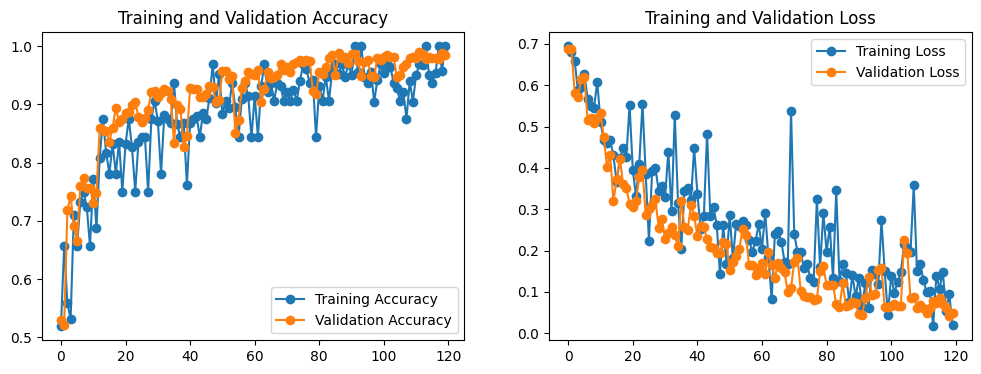

In [14]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=120,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9821 - loss: 0.0526
Test Accuracy: 98.31%
Test loss: 5.11%


/Users/milind/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-04-20 20:44:57.174107: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-20 20:44:57.174338: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-20 20:44:57.174366: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-20 20:44:57.174622: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platfor

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120


2025-04-20 20:44:59.232278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/milind/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.5081 - loss: 0.6945 - val_accuracy: 0.5273 - val_loss: 0.6758
Epoch 2/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.6835 - val_accuracy: 0.4091 - val_loss: 0.6987
Epoch 3/120


2025-04-20 20:45:09.842392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:45:09.842419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:45:09.842432: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:45:09.842441: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:45:09.842445: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13721022732874958011
2025-04-20 20:45:09.842449: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15000162286788551797
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.5707 - loss: 0.6241 - val_accuracy: 0.7363 - val_loss: 0.5813
Epoch 4/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.6193 - val_accuracy: 0.7727 - val_loss: 0.5324
Epoch 5/120


2025-04-20 20:45:20.101868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:45:20.101909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_4/_84]]
2025-04-20 20:45:20.101923: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:45:20.101939: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4971771428765153859
2025-04-20 20:45:20.101958: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:45:20.101971: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1401527664

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 379ms/step - accuracy: 0.7380 - loss: 0.5803 - val_accuracy: 0.7617 - val_loss: 0.5488
Epoch 6/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.7500 - loss: 0.5365

2025-04-20 20:45:32.145339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:45:32.145374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:45:32.145441: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:45:32.145461: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:45:32.145469: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:45:32.145476: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5365 - val_accuracy: 0.6818 - val_loss: 0.5482
Epoch 7/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.7346 - loss: 0.5499 - val_accuracy: 0.7988 - val_loss: 0.4672
Epoch 8/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 12s 451ms/step - accuracy: 0.7188 - loss: 0.5081

2025-04-20 20:45:43.192539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:45:43.192753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:45:43.192785: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:45:43.192799: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:45:43.192817: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:45:43.192825: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7188 - loss: 0.5081 - val_accuracy: 0.6818 - val_loss: 0.6442
Epoch 9/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.7832 - loss: 0.4946 - val_accuracy: 0.6934 - val_loss: 0.5438
Epoch 10/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.5273 - val_accuracy: 0.8182 - val_loss: 0.3987
Epoch 11/120


2025-04-20 20:45:57.727219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:45:57.727275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_44/_70]]
2025-04-20 20:45:57.727284: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7551041724234881679
2025-04-20 20:45:57.727291: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:45:57.727299: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:45:57.727312: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 145492465969

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - accuracy: 0.7433 - loss: 0.5272 - val_accuracy: 0.8555 - val_loss: 0.4061
Epoch 12/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 17s 637ms/step - accuracy: 0.7500 - loss: 0.7654

2025-04-20 20:46:11.316208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:46:11.316285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_30/_74]]
2025-04-20 20:46:11.316303: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12527573713155112152
2025-04-20 20:46:11.316337: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:46:11.316395: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4250608250805337891
2025-04-20 20:46:11.316410: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 200806170

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7500 - loss: 0.7654 - val_accuracy: 0.8636 - val_loss: 0.3614
Epoch 13/120


2025-04-20 20:46:11.533231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:46:11.533265: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:46:11.533282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_10]]
2025-04-20 20:46:11.533292: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:46:11.533298: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:46:11.533305: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6897908179933410283
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 352ms/step - accuracy: 0.7741 - loss: 0.5359 - val_accuracy: 0.7578 - val_loss: 0.5165
Epoch 14/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9375 - loss: 0.1875 - val_accuracy: 0.6818 - val_loss: 0.4637
Epoch 15/120


2025-04-20 20:46:24.558315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:46:24.558369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:46:24.558425: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:46:24.558445: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:46:24.558453: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:46:24.558461: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13721022732874958011
2025-04-20

28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 420ms/step - accuracy: 0.8271 - loss: 0.4111 - val_accuracy: 0.8926 - val_loss: 0.3117
Epoch 16/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.2907 - val_accuracy: 0.8182 - val_loss: 0.4485
Epoch 17/120


2025-04-20 20:46:39.045010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:46:39.045041: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:46:39.045080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_44/_70]]
2025-04-20 20:46:39.045111: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:46:39.045122: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:46:39.045127: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 145492465969

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - accuracy: 0.8333 - loss: 0.3850 - val_accuracy: 0.8555 - val_loss: 0.2959
Epoch 18/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7812 - loss: 0.3965 - val_accuracy: 0.9545 - val_loss: 0.1792
Epoch 19/120


2025-04-20 20:46:51.251046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:46:51.251092: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:46:51.251110: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:46:51.251123: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:46:51.251127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_40/_86]]
2025-04-20 20:46:51.251161: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 75510417

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 388ms/step - accuracy: 0.8214 - loss: 0.4171 - val_accuracy: 0.8730 - val_loss: 0.2769
Epoch 20/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9062 - loss: 0.3303 - val_accuracy: 0.7727 - val_loss: 0.3213
Epoch 21/120


2025-04-20 20:47:04.978344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:47:04.978407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_44/_70]]
2025-04-20 20:47:04.978431: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7551041724234881679
2025-04-20 20:47:04.978442: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:47:04.978447: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:47:04.978462: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 150001622867

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 370ms/step - accuracy: 0.8439 - loss: 0.3672 - val_accuracy: 0.8887 - val_loss: 0.2540
Epoch 22/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9062 - loss: 0.2679

2025-04-20 20:47:17.026797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:47:17.026828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_4/_84]]
2025-04-20 20:47:17.026888: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:47:17.026915: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1730323783996795312
2025-04-20 20:47:17.026929: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:47:17.026939: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5194653605

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9062 - loss: 0.2679 - val_accuracy: 0.9091 - val_loss: 0.2675
Epoch 23/120


2025-04-20 20:47:17.235775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:47:17.235810: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:47:17.235838: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_10]]
2025-04-20 20:47:17.235850: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:47:17.235856: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:47:17.235864: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6897908179933410283
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.8640 - loss: 0.3398 - val_accuracy: 0.8906 - val_loss: 0.2510
Epoch 24/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.3683 - val_accuracy: 1.0000 - val_loss: 0.0856
Epoch 25/120


2025-04-20 20:47:30.387717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:47:30.387763: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:47:30.387775: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:47:30.387779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_44/_70]]
2025-04-20 20:47:30.387797: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:47:30.387822: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 75510417

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 364ms/step - accuracy: 0.8787 - loss: 0.3040 - val_accuracy: 0.8438 - val_loss: 0.3367
Epoch 26/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.8750 - loss: 0.2755

2025-04-20 20:47:42.529715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:47:42.529746: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:47:42.529759: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:47:42.529765: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:47:42.529769: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:47:42.529773: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:47:42.529778: I tensorflow/co

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8750 - loss: 0.2755 - val_accuracy: 0.8182 - val_loss: 0.3627
Epoch 27/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.8767 - loss: 0.3546 - val_accuracy: 0.9336 - val_loss: 0.2084
Epoch 28/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.1724 - val_accuracy: 0.9545 - val_loss: 0.2268
Epoch 29/120


2025-04-20 20:47:52.708354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:47:52.708394: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:47:52.708415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:47:52.708424: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:47:52.708435: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:47:52.708439: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 329ms/step - accuracy: 0.8958 - loss: 0.2988 - val_accuracy: 0.9434 - val_loss: 0.2452
Epoch 30/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.3299 - val_accuracy: 0.7727 - val_loss: 0.3947
Epoch 31/120


2025-04-20 20:48:03.339882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:48:03.339923: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:48:03.339973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_100]]
2025-04-20 20:48:03.339987: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:48:03.339996: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4971771428765153859
2025-04-20 20:48:03.340001: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 44663561

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 371ms/step - accuracy: 0.8911 - loss: 0.3007 - val_accuracy: 0.7949 - val_loss: 0.3460
Epoch 32/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8125 - loss: 0.4255 - val_accuracy: 0.9091 - val_loss: 0.2316
Epoch 33/120


2025-04-20 20:48:15.874388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:48:15.874435: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:48:15.874449: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:48:15.874457: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:48:15.874463: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:48:15.874470: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:48:15.874476: I tensorflow/core/framework/local_rendezv

28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 488ms/step - accuracy: 0.8241 - loss: 0.3946 - val_accuracy: 0.9336 - val_loss: 0.2488
Epoch 34/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.1927 - val_accuracy: 0.9091 - val_loss: 0.2552
Epoch 35/120


2025-04-20 20:48:32.002416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:48:32.002444: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:48:32.002476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_44/_70]]
2025-04-20 20:48:32.002504: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:48:32.002514: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13721022732874958011
2025-04-20 20:48:32.002528: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596

28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 730ms/step - accuracy: 0.8864 - loss: 0.3138 - val_accuracy: 0.8887 - val_loss: 0.3454
Epoch 36/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 21s 803ms/step - accuracy: 0.8125 - loss: 0.5098

2025-04-20 20:48:54.655412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:48:54.655712: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:48:54.655751: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:48:54.655767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1_2/ReadVariableOp_1/_55]]
2025-04-20 20:48:54.655860: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3149310268899836361
2025-04-20 20:48:54.655873: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item 

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8125 - loss: 0.5098 - val_accuracy: 0.9091 - val_loss: 0.3057
Epoch 37/120


2025-04-20 20:48:55.126178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:48:55.126218: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:48:55.126237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_10]]
2025-04-20 20:48:55.126246: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:48:55.126283: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:48:55.126296: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6897908179933410283
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 792ms/step - accuracy: 0.8377 - loss: 0.3689 - val_accuracy: 0.9375 - val_loss: 0.2496
Epoch 38/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 15s 569ms/step - accuracy: 0.9375 - loss: 0.1409

2025-04-20 20:49:20.635189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:49:20.635242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_2_1/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_138]]
2025-04-20 20:49:20.635281: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:49:20.635301: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:49:20.635309: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:49:20.635320: I tensorflow/core/framew

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9375 - loss: 0.1409 - val_accuracy: 0.9091 - val_loss: 0.2399
Epoch 39/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.8538 - loss: 0.3989 - val_accuracy: 0.9121 - val_loss: 0.2147
Epoch 40/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1654 - val_accuracy: 0.9545 - val_loss: 0.1412
Epoch 41/120


2025-04-20 20:49:35.033704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:49:35.033735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_40/_86]]
2025-04-20 20:49:35.033750: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:49:35.033762: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 627639114051189469
2025-04-20 20:49:35.033772: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:49:35.033776: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1454924659698

28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 511ms/step - accuracy: 0.8743 - loss: 0.2877 - val_accuracy: 0.9316 - val_loss: 0.2094
Epoch 42/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7812 - loss: 0.3491 - val_accuracy: 0.8182 - val_loss: 0.4809
Epoch 43/120


2025-04-20 20:49:51.025835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:49:51.025885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_64]]
2025-04-20 20:49:51.025902: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:49:51.025917: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:49:51.025930: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:49:51.025941: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20

28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 481ms/step - accuracy: 0.8738 - loss: 0.2971 - val_accuracy: 0.9473 - val_loss: 0.1804
Epoch 44/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9062 - loss: 0.2655 - val_accuracy: 0.9545 - val_loss: 0.1489
Epoch 45/120


2025-04-20 20:50:06.374082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:50:06.374164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_3_1/add/_116]]
2025-04-20 20:50:06.374174: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:50:06.374201: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:50:06.374208: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7551041724234881679
2025-04-20 20:50:06.374218: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Ke

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - accuracy: 0.9100 - loss: 0.2488 - val_accuracy: 0.9102 - val_loss: 0.1964
Epoch 46/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.3194 - val_accuracy: 0.8182 - val_loss: 0.4764
Epoch 47/120


2025-04-20 20:50:17.833144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:50:17.833180: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:50:17.833184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1_2/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_134]]
2025-04-20 20:50:17.833209: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:50:17.833223: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3133478688654140604
2025-04-20 20:50:17.833227: I tensorflow/core/framewo

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.9018 - loss: 0.2424 - val_accuracy: 0.9551 - val_loss: 0.2392
Epoch 48/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.2526 - val_accuracy: 0.9091 - val_loss: 0.2790
Epoch 49/120


2025-04-20 20:50:28.180356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:50:28.180389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:50:28.180412: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7312419645787811020
2025-04-20 20:50:28.180419: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:50:28.180423: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13721022732874958011
2025-04-20 20:50:28.180431: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15000162286788551797
2025-04-20

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 566ms/step - accuracy: 0.8842 - loss: 0.2930 - val_accuracy: 0.8906 - val_loss: 0.2260
Epoch 50/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 18s 694ms/step - accuracy: 0.8750 - loss: 0.2498

2025-04-20 20:50:46.567157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:50:46.567602: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:50:46.567687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1/ReadVariableOp_1/_59]]
2025-04-20 20:50:46.567697: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:50:46.567714: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 627639114051189469
2025-04-20 20:50:46.567741: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item can

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8750 - loss: 0.2498 - val_accuracy: 1.0000 - val_loss: 0.0691
Epoch 51/120


2025-04-20 20:50:46.839495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:50:46.839531: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:50:46.839548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_10]]
2025-04-20 20:50:46.839555: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:50:46.839561: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:50:46.839567: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6897908179933410283
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 365ms/step - accuracy: 0.9111 - loss: 0.2426 - val_accuracy: 0.9375 - val_loss: 0.1616
Epoch 52/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.1918 - val_accuracy: 0.8636 - val_loss: 0.2941
Epoch 53/120


2025-04-20 20:50:59.143269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:50:59.143319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_2_1/add/_118]]
2025-04-20 20:50:59.143330: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:50:59.143341: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 627639114051189469
2025-04-20 20:50:59.143350: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:50:59.143356: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Ke

28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 453ms/step - accuracy: 0.9174 - loss: 0.2740 - val_accuracy: 0.9648 - val_loss: 0.1250
Epoch 54/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.9062 - loss: 0.2153

2025-04-20 20:51:13.805446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:51:13.805549: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:51:13.805564: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:51:13.805572: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:51:13.805578: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9998076895430092434
2025-04-20 20:51:13.805636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9062 - loss: 0.2153 - val_accuracy: 0.8182 - val_loss: 0.2991
Epoch 55/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 378ms/step - accuracy: 0.9353 - loss: 0.1884 - val_accuracy: 0.9414 - val_loss: 0.1604
Epoch 56/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.2344 - val_accuracy: 0.9545 - val_loss: 0.2158
Epoch 57/120


2025-04-20 20:51:28.328089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:51:28.328139: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:51:28.328163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_44/_70]]
2025-04-20 20:51:28.328173: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:51:28.328187: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:51:28.328194: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 999807689

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.9123 - loss: 0.2243 - val_accuracy: 0.9551 - val_loss: 0.1584
Epoch 58/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.2259 - val_accuracy: 1.0000 - val_loss: 0.1079
Epoch 59/120


2025-04-20 20:51:39.319306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:51:39.319350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_16/_102]]
2025-04-20 20:51:39.319367: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1730323783996795312
2025-04-20 20:51:39.319373: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9103202717892976551
2025-04-20 20:51:39.319384: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:51:39.319390: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 145492465

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 401ms/step - accuracy: 0.9101 - loss: 0.2499 - val_accuracy: 0.9531 - val_loss: 0.1620
Epoch 60/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1953 - val_accuracy: 0.9545 - val_loss: 0.1268
Epoch 61/120


2025-04-20 20:51:51.985474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:51:51.985502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_30/_74]]
2025-04-20 20:51:51.985524: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:51:51.985530: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7551041724234881679
2025-04-20 20:51:51.985537: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:51:51.985544: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 140152766

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.9129 - loss: 0.2249 - val_accuracy: 0.9746 - val_loss: 0.1228
Epoch 62/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1421 - val_accuracy: 0.9545 - val_loss: 0.1085
Epoch 63/120


2025-04-20 20:52:03.444332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:52:03.444368: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:52:03.444412: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:52:03.444425: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:52:03.444430: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9998076895430092434
2025-04-20 20:52:03.444436: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16825957950165846782
2025-04-20 20:52:03.444439: W tensorflow/core/framework/local_rendezv

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 398ms/step - accuracy: 0.9365 - loss: 0.1671 - val_accuracy: 0.9570 - val_loss: 0.1281
Epoch 64/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9062 - loss: 0.2846 - val_accuracy: 0.9545 - val_loss: 0.0969
Epoch 65/120


2025-04-20 20:52:16.611134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:52:16.611220: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:52:16.611242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/ArgMax_1/_150]]
2025-04-20 20:52:16.611275: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:52:16.611304: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:52:16.611316: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600657319

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - accuracy: 0.9215 - loss: 0.1952 - val_accuracy: 0.9609 - val_loss: 0.1221
Epoch 66/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.1130 - val_accuracy: 0.9545 - val_loss: 0.1277
Epoch 67/120


2025-04-20 20:52:26.963498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:52:26.963541: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:52:26.963559: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:52:26.963568: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:52:26.963574: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9998076895430092434
2025-04-20 20:52:26.963582: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600657319707674148
2025-04-20 20:52:26.963589: W tensorflow/core/framework/local_rendezv

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 0.9209 - loss: 0.2164 - val_accuracy: 0.8770 - val_loss: 0.3291
Epoch 68/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.4313 - val_accuracy: 0.7727 - val_loss: 0.4229
Epoch 69/120


2025-04-20 20:52:36.771434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:52:36.771553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:52:36.771568: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:52:36.771574: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13721022732874958011
2025-04-20 20:52:36.771581: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17072917728853095787
2025-04-20 20:52:36.771585: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7369006380720690647
2025-04-20

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.8527 - loss: 0.3838 - val_accuracy: 0.9219 - val_loss: 0.2083
Epoch 70/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.3108 - val_accuracy: 0.8636 - val_loss: 0.2346
Epoch 71/120


2025-04-20 20:52:48.027286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:52:48.027344: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:52:48.027362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_42/_88]]
2025-04-20 20:52:48.027388: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:52:48.027405: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:52:48.027414: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 44663561

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - accuracy: 0.9164 - loss: 0.2367 - val_accuracy: 0.9355 - val_loss: 0.1807
Epoch 72/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.2119 - val_accuracy: 0.9545 - val_loss: 0.1191
Epoch 73/120


2025-04-20 20:52:57.697093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:52:57.697137: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:52:57.697176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_4/_84]]
2025-04-20 20:52:57.697224: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:52:57.697241: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600657319707674148
2025-04-20 20:52:57.697247: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 999807689

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step - accuracy: 0.9151 - loss: 0.2332 - val_accuracy: 0.9668 - val_loss: 0.1091
Epoch 74/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2614 - val_accuracy: 0.9545 - val_loss: 0.0955
Epoch 75/120


2025-04-20 20:53:08.103482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:53:08.103522: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:53:08.103528: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:53:08.103533: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:53:08.103537: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600657319707674148
2025-04-20 20:53:08.103542: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9998076895430092434
2025-04-20 20:53:08.103554: I tensorflow/core/framework/local_rendezv

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 423ms/step - accuracy: 0.9265 - loss: 0.2005 - val_accuracy: 0.9590 - val_loss: 0.1223
Epoch 76/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8438 - loss: 0.4031 - val_accuracy: 1.0000 - val_loss: 0.1309
Epoch 77/120


2025-04-20 20:53:21.558210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:53:21.558244: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:53:21.558249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1_2/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_134]]
2025-04-20 20:53:21.558265: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:53:21.558282: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 627639114051189469
2025-04-20 20:53:21.558293: I tensorflow/core/framewo

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.9174 - loss: 0.2288 - val_accuracy: 0.9375 - val_loss: 0.1544
Epoch 78/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.1426 - val_accuracy: 0.9091 - val_loss: 0.2896
Epoch 79/120


2025-04-20 20:53:32.704958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:53:32.705019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_44/_70]]
2025-04-20 20:53:32.705089: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7551041724234881679
2025-04-20 20:53:32.705122: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:53:32.705135: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13721022732874958011
2025-04-20 20:53:32.705150: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 38105039752

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.9201 - loss: 0.1952 - val_accuracy: 0.9492 - val_loss: 0.1316
Epoch 80/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9062 - loss: 0.1874 - val_accuracy: 0.9545 - val_loss: 0.0938
Epoch 81/120


2025-04-20 20:53:42.461544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:53:42.461608: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:53:42.461623: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:53:42.461630: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:53:42.461637: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17600657319707674148
2025-04-20 20:53:42.461649: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7042160384906250410
2025-04-20 20:53:42.461667: W tensorflow/core/framework/local_rendezv

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step - accuracy: 0.9302 - loss: 0.1851 - val_accuracy: 0.9746 - val_loss: 0.0969
Epoch 82/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0698 - val_accuracy: 1.0000 - val_loss: 0.0502
Epoch 83/120


2025-04-20 20:53:56.015304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:53:56.015354: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:53:56.015363: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:53:56.015386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_28/_72]]
2025-04-20 20:53:56.015411: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:53:56.015429: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755104172

28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 712ms/step - accuracy: 0.9496 - loss: 0.1415 - val_accuracy: 0.9688 - val_loss: 0.0981
Epoch 84/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9375 - loss: 0.1995

2025-04-20 20:54:19.432796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:54:19.433022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_64]]
2025-04-20 20:54:19.433053: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:54:19.433082: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:54:19.433159: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:54:19.433169: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1995 - val_accuracy: 0.9545 - val_loss: 0.1118
Epoch 85/120


2025-04-20 20:54:19.671626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:54:19.671656: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:54:19.671669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_10]]
2025-04-20 20:54:19.671676: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:54:19.671681: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:54:19.671687: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6897908179933410283
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.9474 - loss: 0.1672 - val_accuracy: 0.9727 - val_loss: 0.1016
Epoch 86/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.9375 - loss: 0.2780

2025-04-20 20:54:32.957993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_2_1/add/_118]]
2025-04-20 20:54:32.958487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:54:32.958747: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 627639114051189469
2025-04-20 20:54:32.958798: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17647078024154702221
2025-04-20 20:54:32.958812: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:54:32.958820: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key 

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9375 - loss: 0.2780 - val_accuracy: 0.9545 - val_loss: 0.1154
Epoch 87/120


2025-04-20 20:54:34.126322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:54:34.126433: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:54:34.126453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_10]]
2025-04-20 20:54:34.126515: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:54:34.126551: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:54:34.126574: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6897908179933410283
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 385ms/step - accuracy: 0.9409 - loss: 0.1607 - val_accuracy: 0.9688 - val_loss: 0.0907
Epoch 88/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.9688 - loss: 0.0459

2025-04-20 20:54:47.898985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:54:47.899066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_100]]
2025-04-20 20:54:47.899092: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9103202717892976551
2025-04-20 20:54:47.899106: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:54:47.899118: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10702475243065266769
2025-04-20 20:54:47.899140: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9688 - loss: 0.0459 - val_accuracy: 1.0000 - val_loss: 0.0652
Epoch 89/120


2025-04-20 20:54:48.147479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:54:48.147589: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:54:48.147615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_10]]
2025-04-20 20:54:48.147841: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:54:48.147877: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:54:48.147886: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6897908179933410283
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9482 - loss: 0.1677 - val_accuracy: 0.9727 - val_loss: 0.0863
Epoch 90/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 21s 795ms/step - accuracy: 0.8750 - loss: 0.2672

2025-04-20 20:55:21.286222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:55:21.286762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1/ReadVariableOp_1/_59]]
2025-04-20 20:55:21.286826: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3149310268899836361
2025-04-20 20:55:21.286840: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:55:21.286855: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15360572560789471997
2025-04-20 20:55:21.286869: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item canc

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8750 - loss: 0.2672 - val_accuracy: 0.9545 - val_loss: 0.0796
Epoch 91/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 702ms/step - accuracy: 0.9388 - loss: 0.1614 - val_accuracy: 0.9727 - val_loss: 0.0992
Epoch 92/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 1.0000 - loss: 0.0528

2025-04-20 20:55:45.150377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:55:45.150768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1_2/ReadVariableOp_1/_55]]
2025-04-20 20:55:45.150790: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:55:45.150803: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:55:45.150823: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5634667787206542140
2025-04-20 20:55:45.150834: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item 

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.0528 - val_accuracy: 0.9545 - val_loss: 0.1584
Epoch 93/120


2025-04-20 20:55:45.441255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:55:45.441292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2025-04-20 20:55:45.441327: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:55:45.441358: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13409011846403763715


28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 625ms/step - accuracy: 0.9365 - loss: 0.1926 - val_accuracy: 0.8945 - val_loss: 0.2595
Epoch 94/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 23s 867ms/step - accuracy: 0.8125 - loss: 0.2414

2025-04-20 20:56:10.855315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:56:10.855461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1_2/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_134]]
2025-04-20 20:56:10.855480: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:56:10.855507: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:56:10.855517: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:56:10.855524: I tensorflow/core/frame

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8125 - loss: 0.2414 - val_accuracy: 0.8636 - val_loss: 0.3033
Epoch 95/120


2025-04-20 20:56:11.099911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:56:11.099947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax/_6]]
2025-04-20 20:56:11.099964: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:56:11.099976: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3952026248397573626
2025-04-20 20:56:11.099983: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:56:11.099992: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:56:11

28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 659ms/step - accuracy: 0.9393 - loss: 0.1701 - val_accuracy: 0.8945 - val_loss: 0.2133
Epoch 96/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8438 - loss: 0.3186 - val_accuracy: 0.9091 - val_loss: 0.1303
Epoch 97/120


2025-04-20 20:56:31.983596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:56:31.983641: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:56:31.983650: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:56:31.983656: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:56:31.983663: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:56:31.983668: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:56:31.983675: I tensorflow/core/framework/local_rendezv

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 580ms/step - accuracy: 0.9337 - loss: 0.2004 - val_accuracy: 0.9707 - val_loss: 0.0871
Epoch 98/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0751 - val_accuracy: 0.9545 - val_loss: 0.0691
Epoch 99/120


2025-04-20 20:56:50.248895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:56:50.248939: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:56:50.248966: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:56:50.248977: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1_2/add/_120]]
2025-04-20 20:56:50.248986: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:56:50.248991: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. K

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 387ms/step - accuracy: 0.9522 - loss: 0.1530 - val_accuracy: 0.9785 - val_loss: 0.0770
Epoch 100/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 496ms/step - accuracy: 0.9375 - loss: 0.2117

2025-04-20 20:57:03.696826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:57:03.696994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_64]]
2025-04-20 20:57:03.697014: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:57:03.697018: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:57:03.697078: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:57:03.697100: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9375 - loss: 0.2117 - val_accuracy: 0.9091 - val_loss: 0.2982
Epoch 101/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - accuracy: 0.9549 - loss: 0.1008 - val_accuracy: 0.9570 - val_loss: 0.1061
Epoch 102/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.1963 - val_accuracy: 1.0000 - val_loss: 0.0654
Epoch 103/120


2025-04-20 20:57:19.399513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:57:19.399546: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:57:19.399552: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1730323783996795312
2025-04-20 20:57:19.399557: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:57:19.399561: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:57:19.399565: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9998076895430092434
2025-04-20 20:57:19.399583: W tensorflow/core/framework/local_rendezvo

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 0.9557 - loss: 0.1184 - val_accuracy: 0.9102 - val_loss: 0.1807
Epoch 104/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8125 - loss: 0.5190 - val_accuracy: 0.9091 - val_loss: 0.1696
Epoch 105/120


2025-04-20 20:57:31.129111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:57:31.129150: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:57:31.129174: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:57:31.129184: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:57:31.129189: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9998076895430092434
2025-04-20 20:57:31.129194: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1730323783996795312
2025-04-20 20:57:31.129199: I tensorflow/core/framework/local_rendezvo

28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 843ms/step - accuracy: 0.9037 - loss: 0.2411 - val_accuracy: 0.9375 - val_loss: 0.1301
Epoch 106/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 16s 621ms/step - accuracy: 0.9375 - loss: 0.1774

2025-04-20 20:57:56.467576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:57:56.467642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-20 20:57:56.467854: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:57:56.467868: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:57:56.467872: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:57:56.467904: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10702475243065266769
2025-04-20

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9375 - loss: 0.1774 - val_accuracy: 0.9545 - val_loss: 0.0759
Epoch 107/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 400ms/step - accuracy: 0.9419 - loss: 0.1726 - val_accuracy: 0.9707 - val_loss: 0.0848
Epoch 108/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1761 - val_accuracy: 1.0000 - val_loss: 0.0249
Epoch 109/120


2025-04-20 20:58:10.446615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:58:10.446646: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:58:10.446675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_44/_70]]
2025-04-20 20:58:10.446690: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7551041724234881679
2025-04-20 20:58:10.446695: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 20080617078342277
2025-04-20 20:58:10.446701: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 137210227328

28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 506ms/step - accuracy: 0.9506 - loss: 0.1386 - val_accuracy: 0.9629 - val_loss: 0.1162
Epoch 110/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.1748 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 111/120


2025-04-20 20:58:27.137312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:58:27.137403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add/_104]]
2025-04-20 20:58:27.137427: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:58:27.137442: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9103202717892976551
2025-04-20 20:58:27.137461: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:58:27.137498: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17647078024

28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 424ms/step - accuracy: 0.9459 - loss: 0.1910 - val_accuracy: 0.9023 - val_loss: 0.2425
Epoch 112/120
 1/28 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/step - accuracy: 0.8125 - loss: 0.3617

2025-04-20 20:58:42.267380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:58:42.267443: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:58:42.267456: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:58:42.267506: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:58:42.267514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1/add/_122]]
2025-04-20 20:58:42.267548: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8125 - loss: 0.3617 - val_accuracy: 1.0000 - val_loss: 0.1196
Epoch 113/120


2025-04-20 20:58:42.553867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:58:42.553931: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3914466171735905320
2025-04-20 20:58:42.553989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_10]]
2025-04-20 20:58:42.554000: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17897182511742691725
2025-04-20 20:58:42.554042: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8480475237909232415
2025-04-20 20:58:42.554055: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6897908179933410283
2025-04-2

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 613ms/step - accuracy: 0.9207 - loss: 0.2238 - val_accuracy: 0.9512 - val_loss: 0.1168
Epoch 114/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8750 - loss: 0.2577 - val_accuracy: 1.0000 - val_loss: 0.0738
Epoch 115/120


2025-04-20 20:59:01.440264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:59:01.440376: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:59:01.440411: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:59:01.440425: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:59:01.440437: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:59:01.440444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_67]]
2025-04-

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 305ms/step - accuracy: 0.9519 - loss: 0.1433 - val_accuracy: 0.9609 - val_loss: 0.0877
Epoch 116/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2098 - val_accuracy: 1.0000 - val_loss: 0.0203
Epoch 117/120


2025-04-20 20:59:11.797965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:59:11.798002: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:59:11.798044: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:59:11.798054: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:59:11.798062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_4/_84]]
2025-04-20 20:59:11.798076: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 497177142

28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 426ms/step - accuracy: 0.9366 - loss: 0.1581 - val_accuracy: 0.9355 - val_loss: 0.2008
Epoch 118/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.3006 - val_accuracy: 0.9091 - val_loss: 0.3214
Epoch 119/120


2025-04-20 20:59:26.823667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:59:26.823707: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:59:26.823713: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14549246596980277254
2025-04-20 20:59:26.823718: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14015276648110039656
2025-04-20 20:59:26.823722: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3629858561972274318
2025-04-20 20:59:26.823726: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9998076895430092434
2025-04-20 20:59:26.823736: I tensorflow/core/framework/local_rendezv

28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 514ms/step - accuracy: 0.9626 - loss: 0.1318 - val_accuracy: 0.9727 - val_loss: 0.0757
Epoch 120/120
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 0.0022


2025-04-20 20:59:43.459066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-20 20:59:43.459109: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3810503975215825020
2025-04-20 20:59:43.459117: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4466356105140692156
2025-04-20 20:59:43.459124: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14690832231900476458
2025-04-20 20:59:43.459131: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9998076895430092434
2025-04-20 20:59:43.459144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_64]]
2025-04-2

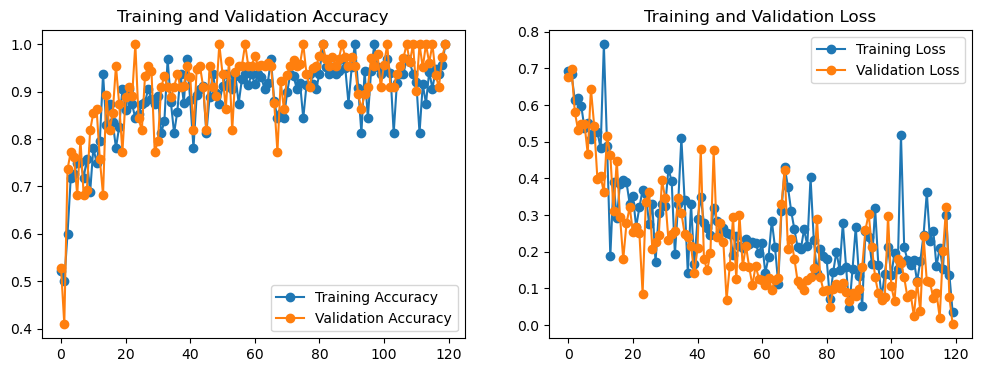

In [14]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=120,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9824 - loss: 0.0642
Test Accuracy: 97.94%
Test loss: 6.46%


In [20]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))


Found 534 images belonging to 2 classes.


/Users/milind/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
                precision    recall  f1-score   support

 freshcucumber       0.99      0.97      0.98       279
rottencucumber       0.97      0.99      0.98       255

      accuracy                           0.98       534
     macro avg       0.98      0.98      0.98       534
  weighted avg       0.98      0.98      0.98       534



In [22]:
model.save('saved_models/cucumber_120.keras')

## Tomato

In [43]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/IND_FRUITS/Tomato/Train'       # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/IND_FRUITS/Tomato/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4395 images belonging to 2 classes.
Found 1320 images belonging to 2 classes.


### 150 epochs with early stopping( patience = 25 )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150


2025-04-19 11:47:41.487284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.5398 - loss: 0.6897

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


137/137 ━━━━━━━━━━━━━━━━━━━━ 57s 394ms/step - accuracy: 0.5401 - loss: 0.6896 - val_accuracy: 0.7264 - val_loss: 0.6133
Epoch 2/150
  1/137 ━━━━━━━━━━━━━━━━━━━━ 1:21 603ms/step - accuracy: 0.8125 - loss: 0.6319

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.8125 - loss: 0.6319 - val_accuracy: 0.7195 - val_loss: 0.6140
Epoch 3/150
137/137 ━━━━━━━━━━━━━━━━━━━━ 57s 419ms/step - accuracy: 0.6922 - loss: 0.6098 - val_accuracy: 0.6616 - val_loss: 0.5816
Epoch 4/150
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6875 - loss: 0.5095 - val_accuracy: 0.6707 - val_loss: 0.5693
Epoch 5/150
137/137 ━━━━━━━━━━━━━━━━━━━━ 51s 370ms/step - accuracy: 0.7367 - loss: 0.5422 - val_accuracy: 0.7271 - val_loss: 0.5410
Epoch 6/150
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.6875 - loss: 0.6146 - val_accuracy: 0.7248 - val_loss: 0.5454
Epoch 7/150
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 303ms/step - accuracy: 0.7894 - loss: 0.4815 - val_accuracy: 0.7317 - val_loss: 0.5413
Epoch 8/150
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.6250 - loss: 0.6737 - val_accuracy: 0.7287 - val_loss: 0.5416
Epoch 9/150
137/137 ━━━━━━━━━━━━━━━━━━━━ 45s 329ms/step - accuracy: 0.7867 - loss: 0.4703 - val_

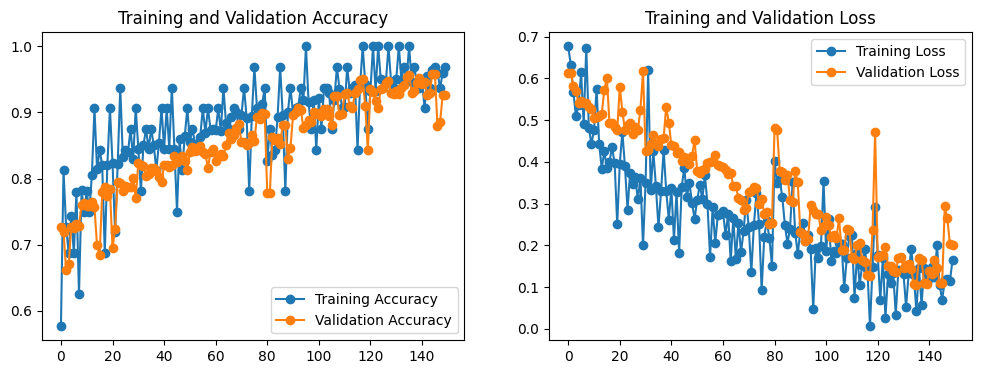

In [16]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=150,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9588 - loss: 0.1152
Test Accuracy: 95.76%
Test loss: 10.45%


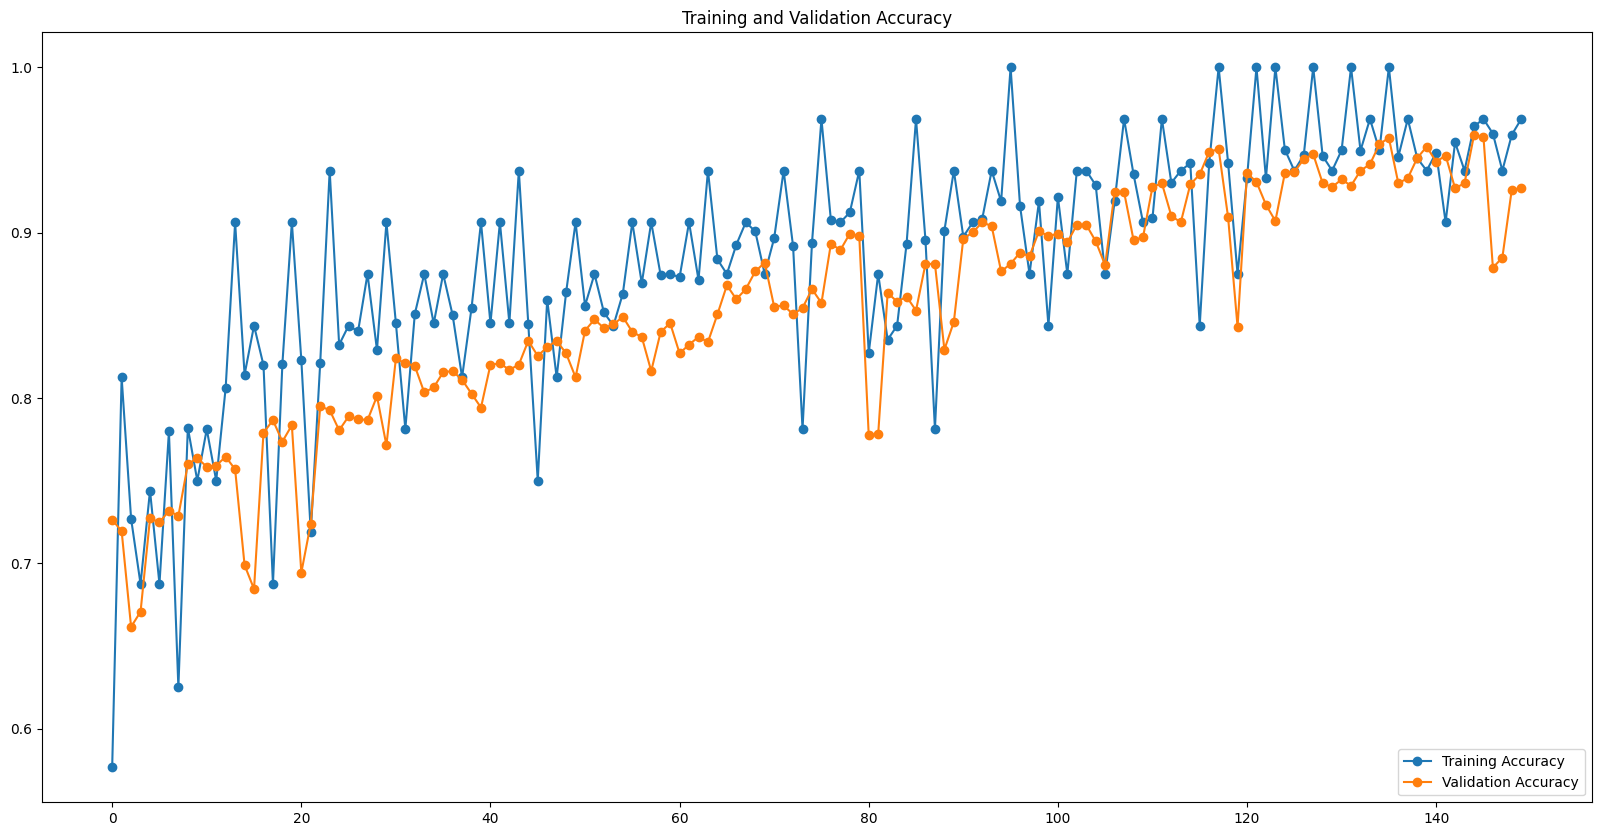

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

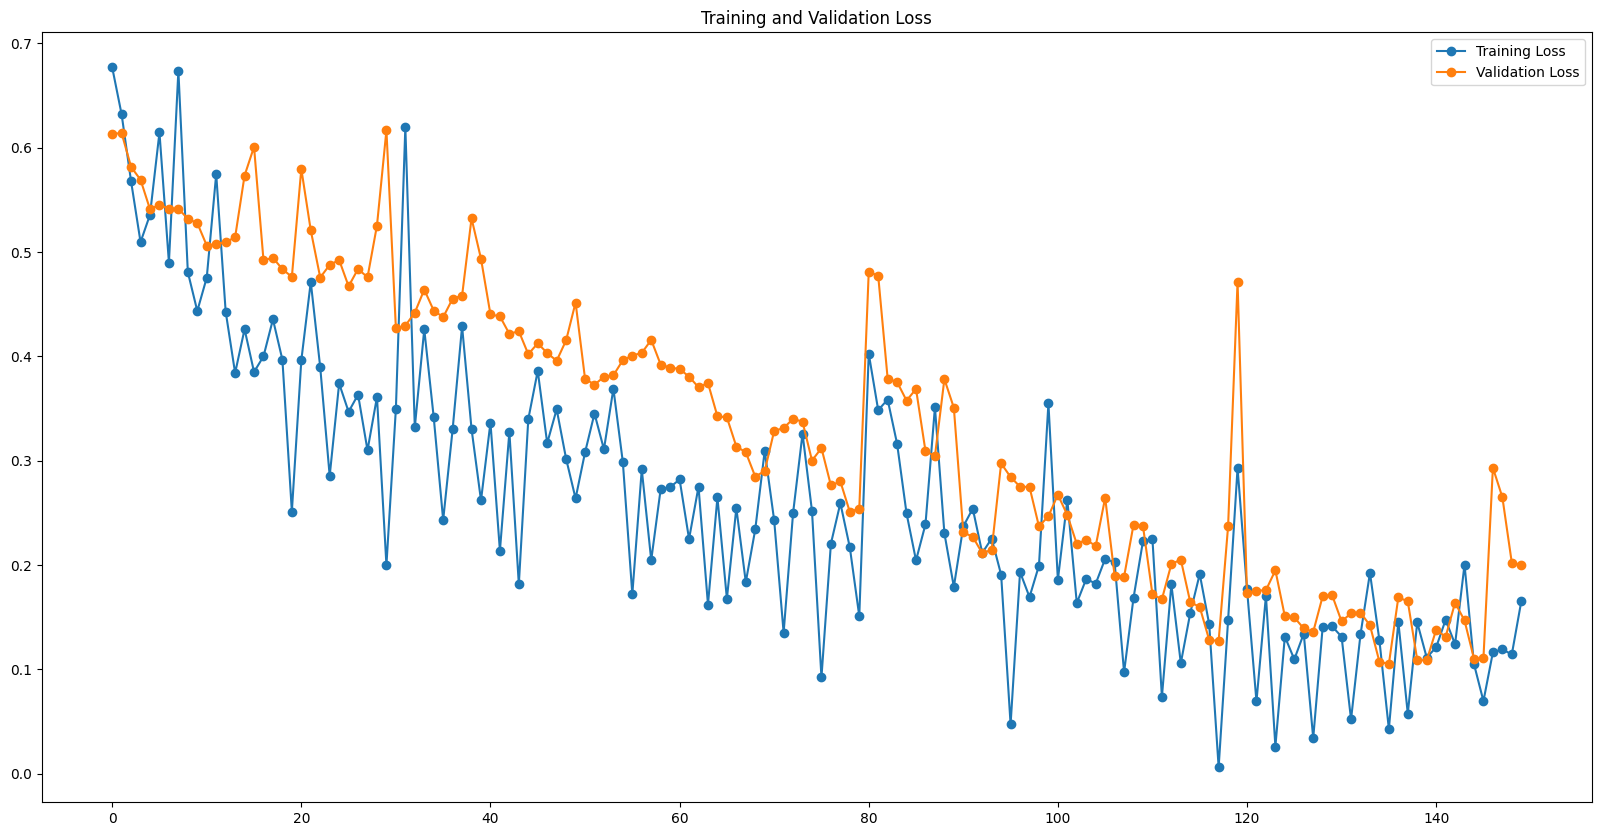

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=25,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.9474 - loss: 0.1353 - val_accuracy: 0.9543 - val_loss: 0.1282
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9688 - loss: 0.1073 - val_accuracy: 0.9527 - val_loss: 0.1233
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - accuracy: 0.9506 - loss: 0.1180 - val_accuracy: 0.9474 - val_loss: 0.1298
Epoch 4/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9688 - loss: 0.1796 - val_accuracy: 0.9421 - val_loss: 0.1251
Epoch 5/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - accuracy: 0.9388 - loss: 0.1636 - val_accuracy: 0.9284 - val_loss: 0.1936
Epoch 6/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9375 - loss: 0.1215 - val_accuracy: 0.9245 - val_loss: 0.1981
Epoch 7/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.9415 - loss: 0.1429 - val_accuracy: 0.9123 - val_loss: 0.1980
Epoch 8/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9688 - loss: 0.0555 - 

In [32]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9726 - loss: 0.0720
Test Accuracy: 97.42%
Test loss: 7.37%


In [34]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=25,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.9517 - loss: 0.1191 - val_accuracy: 0.9627 - val_loss: 0.0996
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9375 - loss: 0.0953 - val_accuracy: 0.9649 - val_loss: 0.1002
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.9693 - loss: 0.0870 - val_accuracy: 0.9421 - val_loss: 0.1110
Epoch 4/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9375 - loss: 0.1500 - val_accuracy: 0.9482 - val_loss: 0.1119
Epoch 5/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.9409 - loss: 0.1351 - val_accuracy: 0.9619 - val_loss: 0.1061
Epoch 6/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9062 - loss: 0.1716 - val_accuracy: 0.9604 - val_loss: 0.1057
Epoch 7/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.9637 - loss: 0.1015 - val_accuracy: 0.9642 - val_loss: 0.0898
Epoch 8/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9688 - loss: 0.0395 - 

In [36]:

# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9739 - loss: 0.0639
Test Accuracy: 97.73%
Test loss: 6.11%


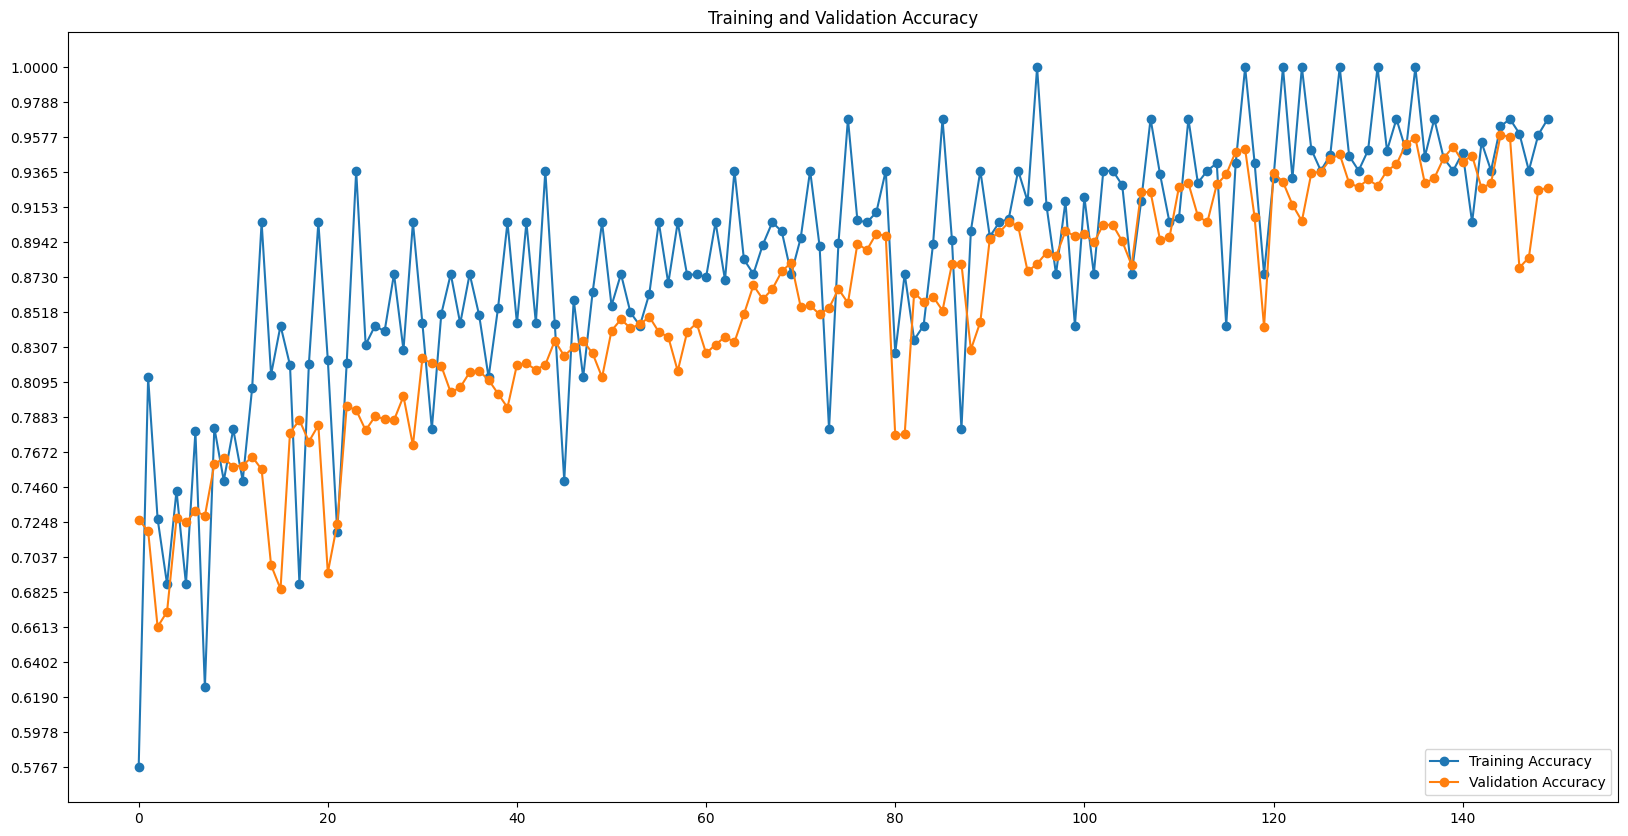

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
y_min, y_max = min(min(acc), min(val_acc)), max(max(acc), max(val_acc))
ticks = np.linspace(y_min, y_max, 21)
plt.yticks(ticks)  # explicitly set 21 yticks :contentReference[oaicite:0]{index=0}
plt.show()

In [49]:
model.save('saved_models/tomato.keras')

In [41]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/tomato.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [45]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))


Found 1320 images belonging to 2 classes.


/Users/milind/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step
              precision    recall  f1-score   support

  freshtamto       0.99      0.96      0.98       679
 rottentamto       0.96      0.99      0.98       641

    accuracy                           0.98      1320
   macro avg       0.98      0.98      0.98      1320
weighted avg       0.98      0.98      0.98      1320



In [47]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.3f}')

42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.9803 - loss: 0.0535
Test Accuracy: 97.73%
Test loss: 0.061


# Potato

In [29]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = 'IND_FRUITS/Potato/Train'       # Replace with your training data directory
validation_dir = 'IND_FRUITS/Potato/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1815 images belonging to 2 classes.
Found 1117 images belonging to 2 classes.


### 150 epochs with early stopping( patience = 25 )

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.5677 - loss: 0.6918 - val_accuracy: 0.5634 - val_loss: 0.6845
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5625 - loss: 0.6818 - val_accuracy: 0.5643 - val_loss: 0.6842
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.5809 - loss: 0.6815 - val_accuracy: 0.5653 - val_loss: 0.6635
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5312 - loss: 0.6576 - val_accuracy: 0.5597 - val_loss: 0.6631
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.6025 - loss: 0.6617 - val_accuracy: 0.5643 - val_loss: 0.6842
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5000 - loss: 0.7112 - val_accuracy: 0.5653 - val_loss: 0.6840
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.6153 - loss: 0.6708 - val_accuracy: 0.5689 - val_loss: 0.6839
Epoch 8/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5938 - loss: 0.6819 - val_accur

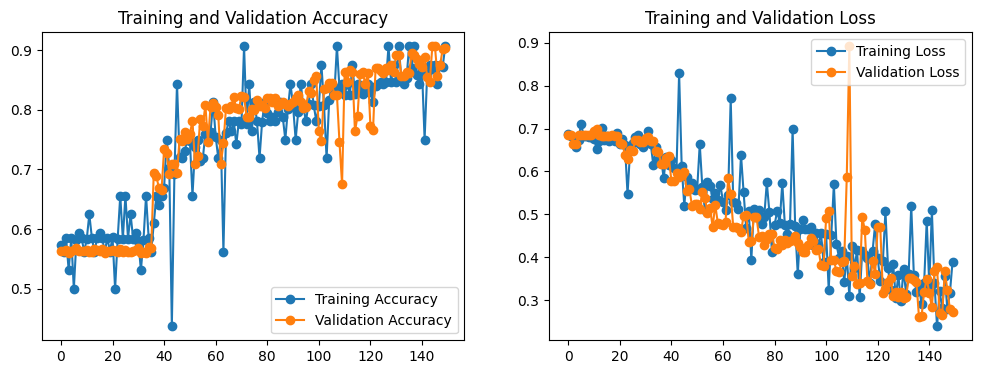

In [57]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=150,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.8950 - loss: 0.2625
Test Accuracy: 89.53%
Test loss: 26.01%


In [61]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=50,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - accuracy: 0.8681 - loss: 0.3075 - val_accuracy: 0.8906 - val_loss: 0.2754
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9130 - loss: 0.3872 - val_accuracy: 0.8879 - val_loss: 0.2765
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.8756 - loss: 0.3284 - val_accuracy: 0.8364 - val_loss: 0.3720
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8438 - loss: 0.2986 - val_accuracy: 0.8502 - val_loss: 0.3541
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.8634 - loss: 0.3491 - val_accuracy: 0.8860 - val_loss: 0.2936
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9375 - loss: 0.2368 - val_accuracy: 0.8879 - val_loss: 0.2925
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.8704 - loss: 0.3312 - val_accuracy: 0.8511 - val_loss: 0.3474
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 1.0000 - loss: 0.1296 - val_accuracy: 0.

In [63]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9254 - loss: 0.1794
Test Accuracy: 93.55%
Test loss: 17.30%


In [65]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=50,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.8696 - loss: 0.3115 - val_accuracy: 0.9265 - val_loss: 0.1964
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8750 - loss: 0.2613 - val_accuracy: 0.9265 - val_loss: 0.1957
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.9072 - loss: 0.2478 - val_accuracy: 0.8244 - val_loss: 0.3934
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8750 - loss: 0.3697 - val_accuracy: 0.8888 - val_loss: 0.2856
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.9069 - loss: 0.2362 - val_accuracy: 0.9256 - val_loss: 0.1944
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9375 - loss: 0.1962 - val_accuracy: 0.9108 - val_loss: 0.2140
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9037 - loss: 0.2576 - val_accuracy: 0.9265 - val_loss: 0.1924
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8750 - loss: 0.3333 - val_accuracy: 0.

In [66]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.9438 - loss: 0.1580
Test Accuracy: 94.72%
Test loss: 14.82%


In [69]:
model.save('saved_models/Potato_250.keras')

In [71]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=50,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 327ms/step - accuracy: 0.9109 - loss: 0.2205 - val_accuracy: 0.9357 - val_loss: 0.1763
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9375 - loss: 0.2315 - val_accuracy: 0.9384 - val_loss: 0.1680
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.9208 - loss: 0.2061 - val_accuracy: 0.9540 - val_loss: 0.1426
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8750 - loss: 0.2234 - val_accuracy: 0.9531 - val_loss: 0.1423
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 322ms/step - accuracy: 0.9249 - loss: 0.1889 - val_accuracy: 0.9403 - val_loss: 0.1590
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9375 - loss: 0.1882 - val_accuracy: 0.9357 - val_loss: 0.1687
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.9208 - loss: 0.2288 - val_accuracy: 0.9403 - val_loss: 0.1494
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9375 - loss: 0.1608 - val_accuracy: 0.

In [73]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9476 - loss: 0.1153
Test Accuracy: 94.99%
Test loss: 11.27%


In [75]:
model.save('saved_models/Potato_300.keras')

In [35]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/Potato_300.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [37]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
    
from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))


Found 1117 images belonging to 2 classes.


/Users/milind/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step
              precision    recall  f1-score   support

 freshpatato       0.96      0.93      0.94       487
rottenpatato       0.95      0.97      0.96       630

    accuracy                           0.95      1117
   macro avg       0.95      0.95      0.95      1117
weighted avg       0.95      0.95      0.95      1117



In [38]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.3f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.9526 - loss: 0.1046
Test Accuracy: 94.99%
Test loss: 0.113


# Banana

In [5]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = 'IND_FRUITS/Banana/Train'       # Replace with your training data directory
validation_dir = 'IND_FRUITS/Banana/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5400 images belonging to 2 classes.
Found 1792 images belonging to 2 classes.


### 150 epochs with early stopping( patience = 25 )

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 48s 269ms/step - accuracy: 0.7199 - loss: 0.4530 - val_accuracy: 0.9821 - val_loss: 0.0654
Epoch 2/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9810 - val_loss: 0.0745
Epoch 3/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 41s 243ms/step - accuracy: 0.9798 - loss: 0.0814 - val_accuracy: 0.9872 - val_loss: 0.0350
Epoch 4/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9375 - loss: 0.0688 - val_accuracy: 0.9860 - val_loss: 0.0409
Epoch 5/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 51s 306ms/step - accuracy: 0.9875 - loss: 0.0413 - val_accuracy: 0.9927 - val_loss: 0.0250
Epoch 6/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0.9911 - val_loss: 0.0277
Epoch 7/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 45s 265ms/step - accuracy: 0.9838 - loss: 0.0549 - val_accuracy: 0.9961 - val_loss: 0.0132
Epoch 8/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 1.0000 - loss: 0

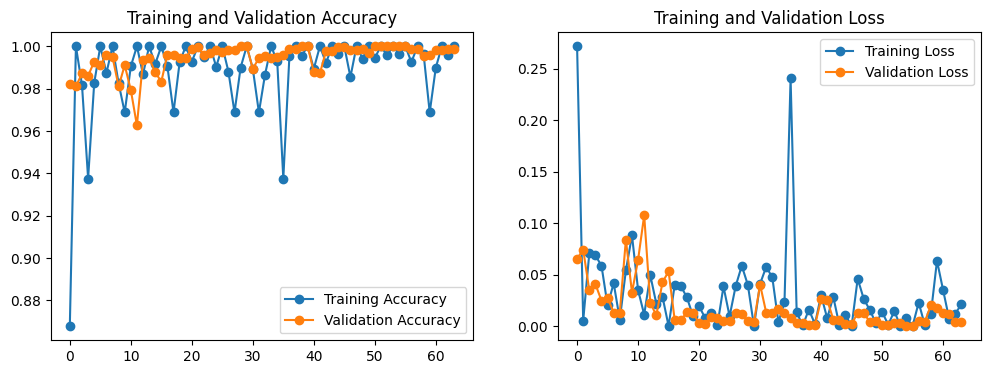

In [82]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=150,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [83]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 1.0000 - loss: 0.0011
Test Accuracy: 100.00%
Test loss: 0.11%


In [84]:
model.save('saved_models/Banana.keras')

In [7]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/Banana.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

2025-04-20 17:02:16.570117: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-20 17:02:16.570613: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-20 17:02:16.571298: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-20 17:02:16.572048: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-20 17:02:16.573028: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
    
from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))


Found 1792 images belonging to 2 classes.
 1/56 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step

/Users/milind/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step
              precision    recall  f1-score   support

 freshbanana       1.00      1.00      1.00       892
rottenbanana       1.00      1.00      1.00       900

    accuracy                           1.00      1792
   macro avg       1.00      1.00      1.00      1792
weighted avg       1.00      1.00      1.00      1792



In [23]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.2f}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 1.0000 - loss: 0.0014
Test Accuracy: 100.00%
Test loss: 0.00


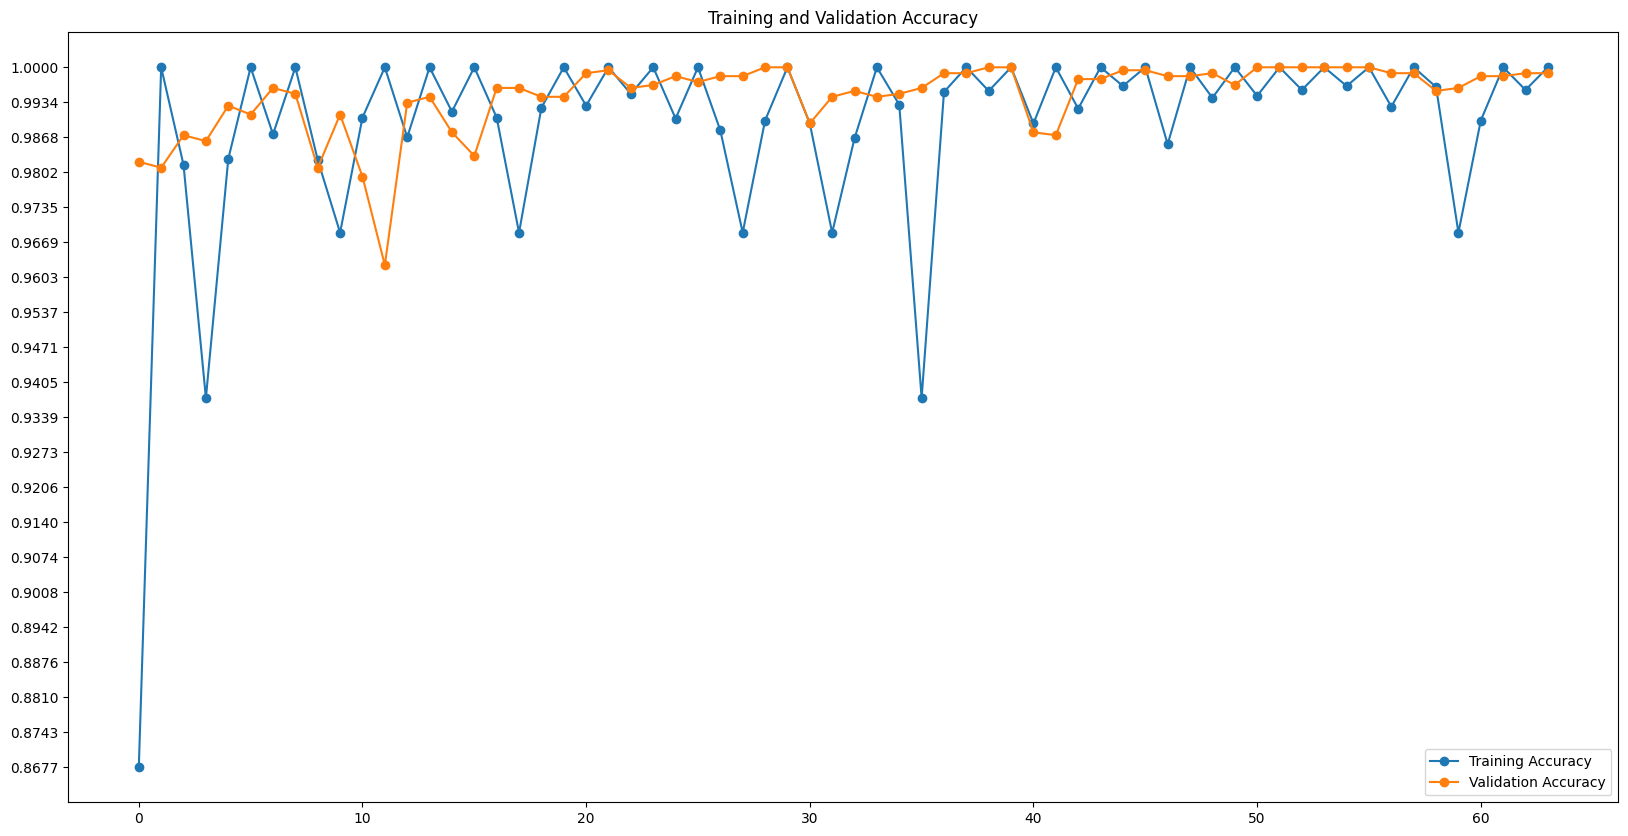

In [90]:
plt.figure(figsize=(20, 10))
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
y_min, y_max = min(min(acc), min(val_acc)), max(max(acc), max(val_acc))
ticks = np.linspace(y_min, y_max, 21)
plt.yticks(ticks)  # explicitly set 21 yticks :contentReference[oaicite:0]{index=0}
plt.show()

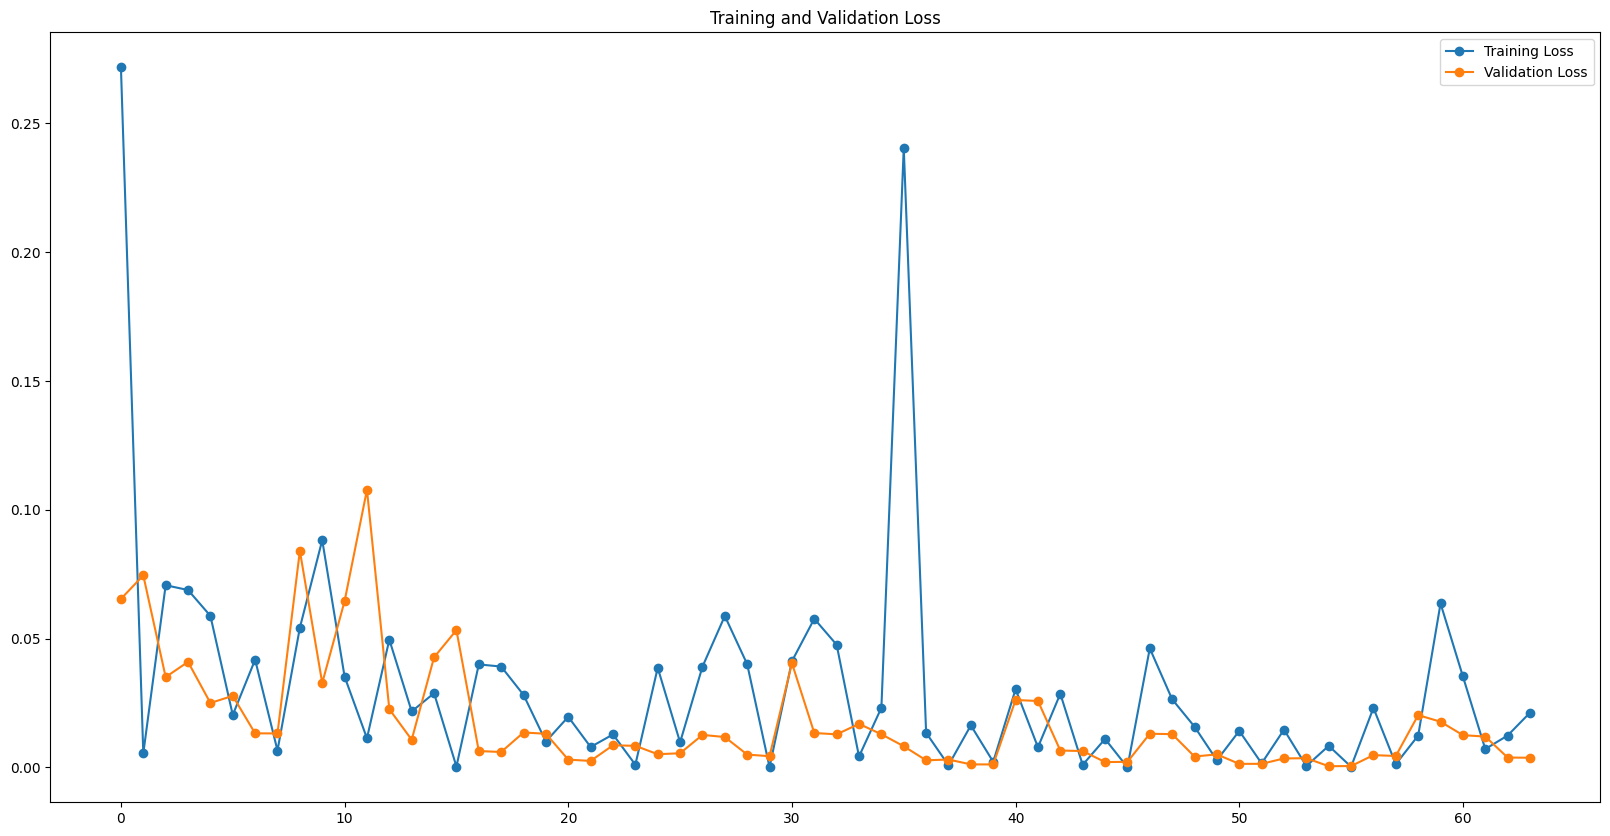

In [92]:
plt.figure(figsize=(20, 10))
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Okra

In [26]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = 'IND_FRUITS/Okra/Train'       # Replace with your training data directory
validation_dir = 'IND_FRUITS/Okra/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 973 images belonging to 2 classes.
Found 594 images belonging to 2 classes.


### 150 epochs with early stopping( patience = 25 )

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6302 - loss: 0.6849 - val_accuracy: 0.6215 - val_loss: 0.6653
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7188 - loss: 0.6468 - val_accuracy: 0.6285 - val_loss: 0.6624
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6558 - loss: 0.6567 - val_accuracy: 0.6267 - val_loss: 0.6094
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 325ms/step - accuracy: 0.7188 - loss: 0.5468 - val_accuracy: 0.6181 - val_loss: 0.5988
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - accuracy: 0.6541 - loss: 0.5813 - val_accuracy: 0.6198 - val_loss: 0.6732
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7188 - loss: 0.5984 - val_accuracy: 0.6302 - val_loss: 0.6760
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 391ms/step - accuracy: 0.6458 - loss: 0.6714 - val_accuracy: 0.6233 - val_loss: 0.6628
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7500 - loss: 0.6192 - val_accuracy

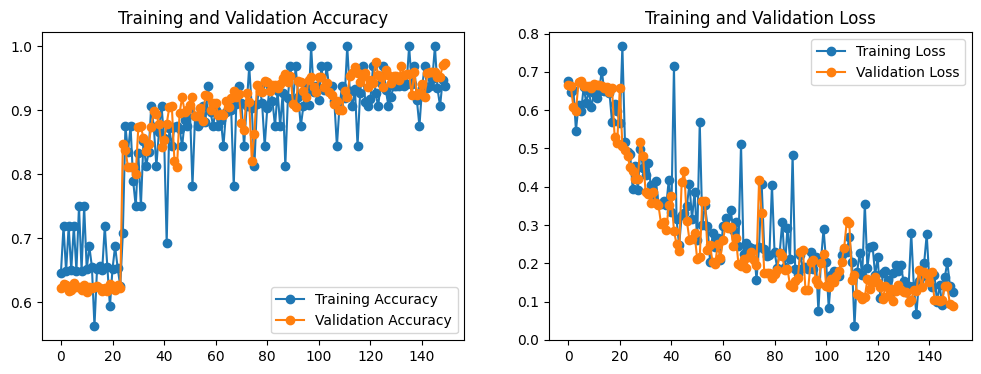

In [99]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=150,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [101]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9715 - loss: 0.0812
Test Accuracy: 97.47%
Test loss: 8.60%


In [106]:
model.save('saved_models/Okra_150.keras')

In [134]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [156]:
from tensorflow.keras.models import load_model
model = load_model(
    'saved_models/Okra_150.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## 50 more epochs

In [158]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=50,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 368ms/step - accuracy: 0.9355 - loss: 0.1716 - val_accuracy: 0.9618 - val_loss: 0.1050
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9688 - loss: 0.1178 - val_accuracy: 0.9618 - val_loss: 0.0985
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 409ms/step - accuracy: 0.9424 - loss: 0.1619 - val_accuracy: 0.9618 - val_loss: 0.0954
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9688 - loss: 0.0880 - val_accuracy: 0.9618 - val_loss: 0.0926
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 709ms/step - accuracy: 0.9515 - loss: 0.1123 - val_accuracy: 0.9705 - val_loss: 0.0826
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8750 - loss: 0.2697 - val_accuracy: 0.9722 - val_loss: 0.0822
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.9502 - loss: 0.1292 - val_accuracy: 0.9497 - val_loss: 0.1088
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9688 - loss: 0.0372 - val_accuracy: 0.9

In [160]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9788 - loss: 0.0609
Test Accuracy: 98.48%
Test loss: 5.25%


## 50 more epochs

In [172]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=50,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 382ms/step - accuracy: 0.9497 - loss: 0.1186 - val_accuracy: 0.9792 - val_loss: 0.0598
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 1.0000 - loss: 0.0368 - val_accuracy: 0.9757 - val_loss: 0.0645
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.9507 - loss: 0.1257 - val_accuracy: 0.9531 - val_loss: 0.1324
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9688 - loss: 0.0600 - val_accuracy: 0.9635 - val_loss: 0.1265
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.9632 - loss: 0.1127 - val_accuracy: 0.9236 - val_loss: 0.1946
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7812 - loss: 0.3430 - val_accuracy: 0.9444 - val_loss: 0.1551
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.9549 - loss: 0.1493 - val_accuracy: 0.9566 - val_loss: 0.1224
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8750 - loss: 0.4429 - val_accuracy: 0.956

In [174]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9749 - loss: 0.0623
Test Accuracy: 98.32%
Test loss: 4.89%


In [176]:
model.save('saved_models/Okra_250.keras')

In [24]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/Okra_250.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))



Found 594 images belonging to 2 classes.


/Users/milind/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
              precision    recall  f1-score   support

   freshokra       0.99      0.98      0.99       370
  rottenokra       0.97      0.98      0.98       224

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



In [30]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9829 - loss: 0.0504
Test Accuracy: 98.32%
Test loss: 4.89%


# Apple

In [45]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = 'All apples/Train'       # Replace with your training data directory
validation_dir = 'All apples/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5672 images belonging to 2 classes.
Found 1779 images belonging to 2 classes.


### 150 epochs with early stopping( patience = 25 )

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-04-27 11:11:31.189003: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-27 11:11:31.189277: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-27 11:11:31.189288: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1745732491.189978 40266338 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, d

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150


2025-04-27 11:11:32.950535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


177/177 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.6336 - loss: 0.6031 - val_accuracy: 0.8909 - val_loss: 0.3351
Epoch 2/150
  1/177 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9375 - loss: 0.3290

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9375 - loss: 0.3290 - val_accuracy: 0.8943 - val_loss: 0.3145
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 37s 208ms/step - accuracy: 0.8918 - loss: 0.2962 - val_accuracy: 0.9051 - val_loss: 0.2246
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9062 - loss: 0.1467 - val_accuracy: 0.9119 - val_loss: 0.2146
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - accuracy: 0.8934 - loss: 0.2810 - val_accuracy: 0.9176 - val_loss: 0.2078
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9062 - loss: 0.2132 - val_accuracy: 0.9210 - val_loss: 0.2018
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 36s 205ms/step - accuracy: 0.9019 - loss: 0.2404 - val_accuracy: 0.9210 - val_loss: 0.1908
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9062 - loss: 0.2530 - val_accuracy: 0.9295 - val_loss: 0.1913
Epoch 9/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 40s 227ms/step - accuracy: 0.9113 - loss: 0.2083 - val_

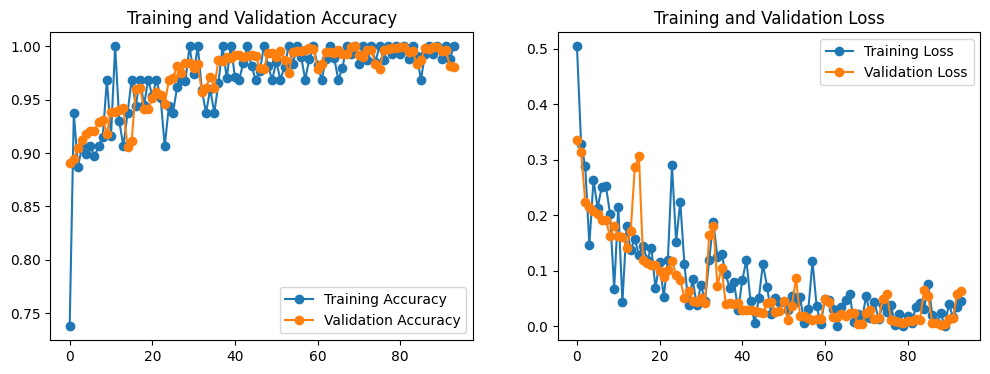

In [11]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=150,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 :.2f}%')


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9999 - loss: 0.0054
Test Accuracy: 99.94%
Test loss: 0.00%


In [13]:
model.save('saved_models/Apple_150.keras')

In [41]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/Apple_150.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))



Found 1779 images belonging to 2 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
              precision    recall  f1-score   support

 freshapples       1.00      1.00      1.00       791
rottenapples       1.00      1.00      1.00       988

    accuracy                           1.00      1779
   macro avg       1.00      1.00      1.00      1779
weighted avg       1.00      1.00      1.00      1779



# Oranges

In [28]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = 'All oranges/Train'       # Replace with your training data directory
validation_dir = 'All oranges/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3061 images belonging to 2 classes.
Found 791 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 24s 220ms/step - accuracy: 0.6326 - loss: 0.5998 - val_accuracy: 0.8164 - val_loss: 0.3759
Epoch 2/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8125 - loss: 0.3455 - val_accuracy: 0.8138 - val_loss: 0.3788
Epoch 3/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.8474 - loss: 0.3808 - val_accuracy: 0.9219 - val_loss: 0.2510
Epoch 4/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9375 - loss: 0.2635 - val_accuracy: 0.9141 - val_loss: 0.2508
Epoch 5/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.8762 - loss: 0.3053 - val_accuracy: 0.9219 - val_loss: 0.1920
Epoch 6/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9062 - loss: 0.2375 - val_accuracy: 0.9193 - val_loss: 0.1943
Epoch 7/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.8775 - loss: 0.2845 - val_accuracy: 0.9310 - val_loss: 0.1845
Epoch 8/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9062 - loss: 0.2773 - val_accu

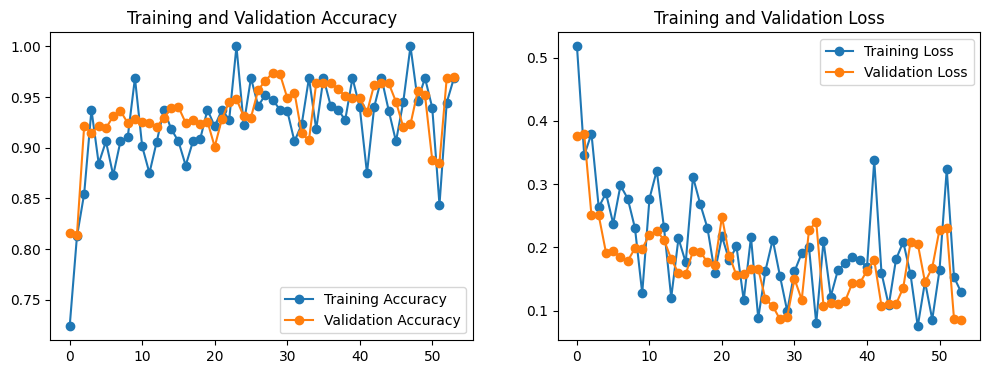

In [22]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=150,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9773 - loss: 0.0743
Test Accuracy: 97.47%
Test loss: 8.42%


In [24]:
model.save('saved_models/Oranges_150.keras')

In [25]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/Oranges_150.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))


Found 791 images belonging to 2 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/25 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step

2025-04-27 17:59:38.537951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
               precision    recall  f1-score   support

 freshoranges       0.97      0.98      0.97       388
rottenoranges       0.98      0.97      0.97       403

     accuracy                           0.97       791
    macro avg       0.97      0.97      0.97       791
 weighted avg       0.97      0.97      0.97       791



### 30 more epochs

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.9397 - loss: 0.1676 - val_accuracy: 0.9727 - val_loss: 0.1090
Epoch 2/30
 1/95 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9688 - loss: 0.0704

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9688 - loss: 0.0704 - val_accuracy: 0.9740 - val_loss: 0.1114
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.9286 - loss: 0.1804 - val_accuracy: 0.9349 - val_loss: 0.1355
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9375 - loss: 0.1613 - val_accuracy: 0.9714 - val_loss: 0.0971
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.9341 - loss: 0.1742 - val_accuracy: 0.9701 - val_loss: 0.1047
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9688 - loss: 0.1008 - val_accuracy: 0.9648 - val_loss: 0.1011
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - accuracy: 0.9460 - loss: 0.1427 - val_accuracy: 0.9766 - val_loss: 0.0893
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9375 - loss: 0.0928 - val_accuracy: 0.9766 - val_loss: 0.0887
Epoch 9/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.9519 - loss: 0.1324 - val_accuracy: 0.9701 - val_

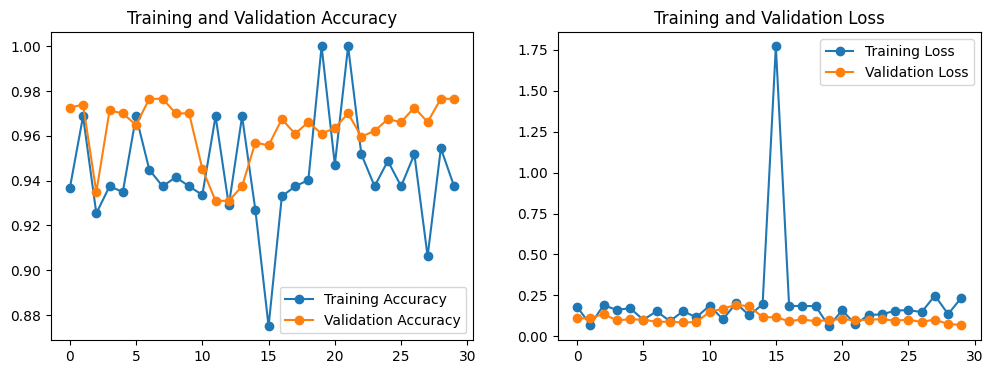

In [32]:
# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1 * 100:.2f}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9779 - loss: 0.0693
Test Accuracy: 97.60%
Test loss: 7.22%


In [34]:
model.save('saved_models/Oranges_180.keras')

In [35]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))


Found 791 images belonging to 2 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
               precision    recall  f1-score   support

 freshoranges       0.98      0.97      0.98       388
rottenoranges       0.97      0.99      0.98       403

     accuracy                           0.98       791
    macro avg       0.98      0.98      0.98       791
 weighted avg       0.98      0.98      0.98       791

